In [59]:
import pandas as pd
import geopandas as gpd
import pickle
from shapely.geometry import Polygon, MultiPolygon
import numpy as np
import seaborn as sns; sns.set()

%matplotlib inline
import matplotlib.pyplot as plt

root_path = "D:/GeoData/"
Main_CRS = "EPSG:27700"

In [60]:
#Function for opening saved data
def load_obj(name ):
    with open(root_path + 'WorkingData/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [61]:
def MakePolygon(centre, sq_sz, inp_crs):
    mnx = centre[0]-(sq_sz/2)
    mny = centre[1]-(sq_sz/2)
    mxx = centre[0]+(sq_sz/2)
    mxy = centre[1]+(sq_sz/2)
    polygon =Polygon([(mnx, mny), (mnx,mxy), (mxx,mxy), (mxx,mny), (mnx, mny)])
    poly_gdf = gpd.GeoDataFrame(geometry=[polygon], crs=inp_crs)
    return poly_gdf

In [70]:
gdf = load_obj("raw_gdf")

In [96]:
sm_gdf = load_obj("raw_gdf_StPauls")

In [66]:
gdf["Type"].dropna().unique().tolist()

['RailwayStations',
 'FerryTerminals',
 'BusStops',
 'RoadAccidents',
 'Postcodes',
 'LReg',
 'FireStations',
 'Schools',
 'Clinic',
 'Dentists',
 'GP',
 'Hospital',
 'Opticians',
 'Pharmacy',
 'Care homes and care at home',
 'All_GB',
 'LocalAuthorities',
 'LSOA',
 'GreenSpace',
 'Rivers',
 'Railway_Lines',
 'Urban_Region',
 'Coastline',
 'Lakes',
 'Road',
 'LocalNatureReserve',
 'ConservationArea',
 'Listed Buildings',
 'MetOffice']

C:\Users\richa\Anaconda3\envs\GeoData\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

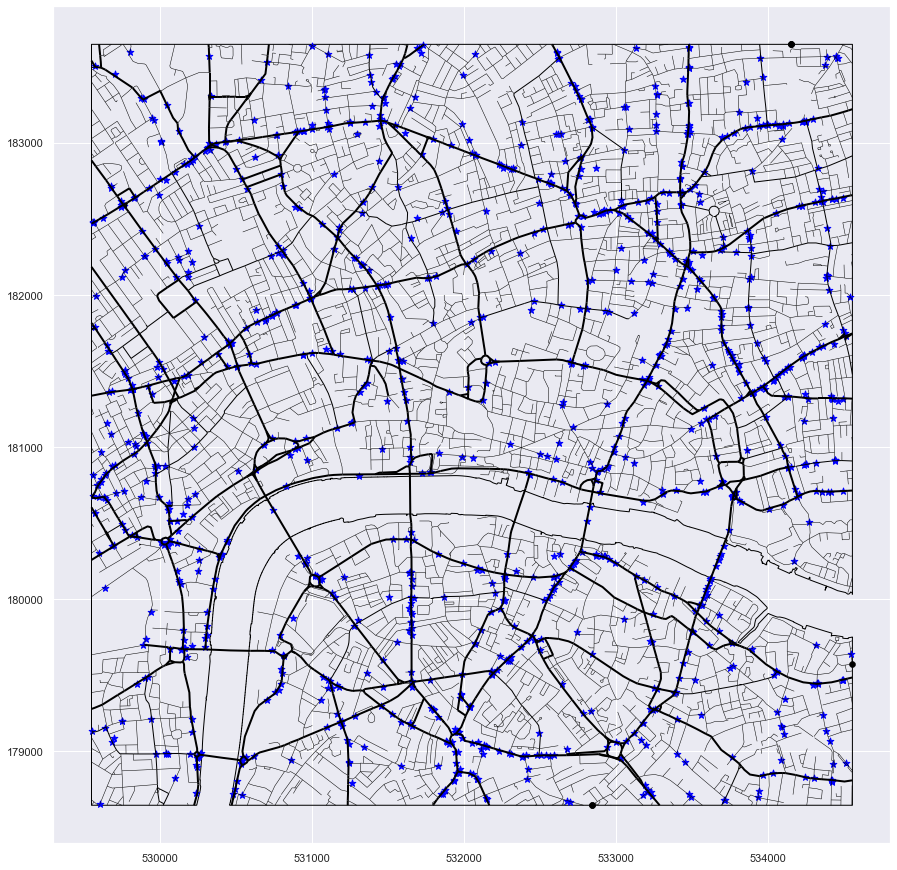

In [97]:
fig, ax = plt.subplots(1, figsize=(15,30))
sm_gdf.loc[sm_gdf["Type"]=="All_GB",:].plot(ax=ax, color='none', edgecolor='black', zorder=1)
sm_gdf.loc[sm_gdf["Type"]=="RoadAccidents",:].plot(ax=ax, color='blue', marker='*',markersize=50, zorder=2)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (sm_gdf["Name"]=="Motorway"),:].plot(ax=ax, color='black', linewidth=3, zorder=3)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (sm_gdf["Name"]=="A Road"),:].plot(ax=ax, color='black', linewidth=2, zorder=4)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (sm_gdf["Name"]=="B Road"),:].plot(ax=ax, color='black', linewidth=1, zorder=5)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (~sm_gdf["Name"].isin(["Motorway", "A Road", "B Road"])),:].plot(ax=ax, color='black', linewidth=0.5, zorder=6)

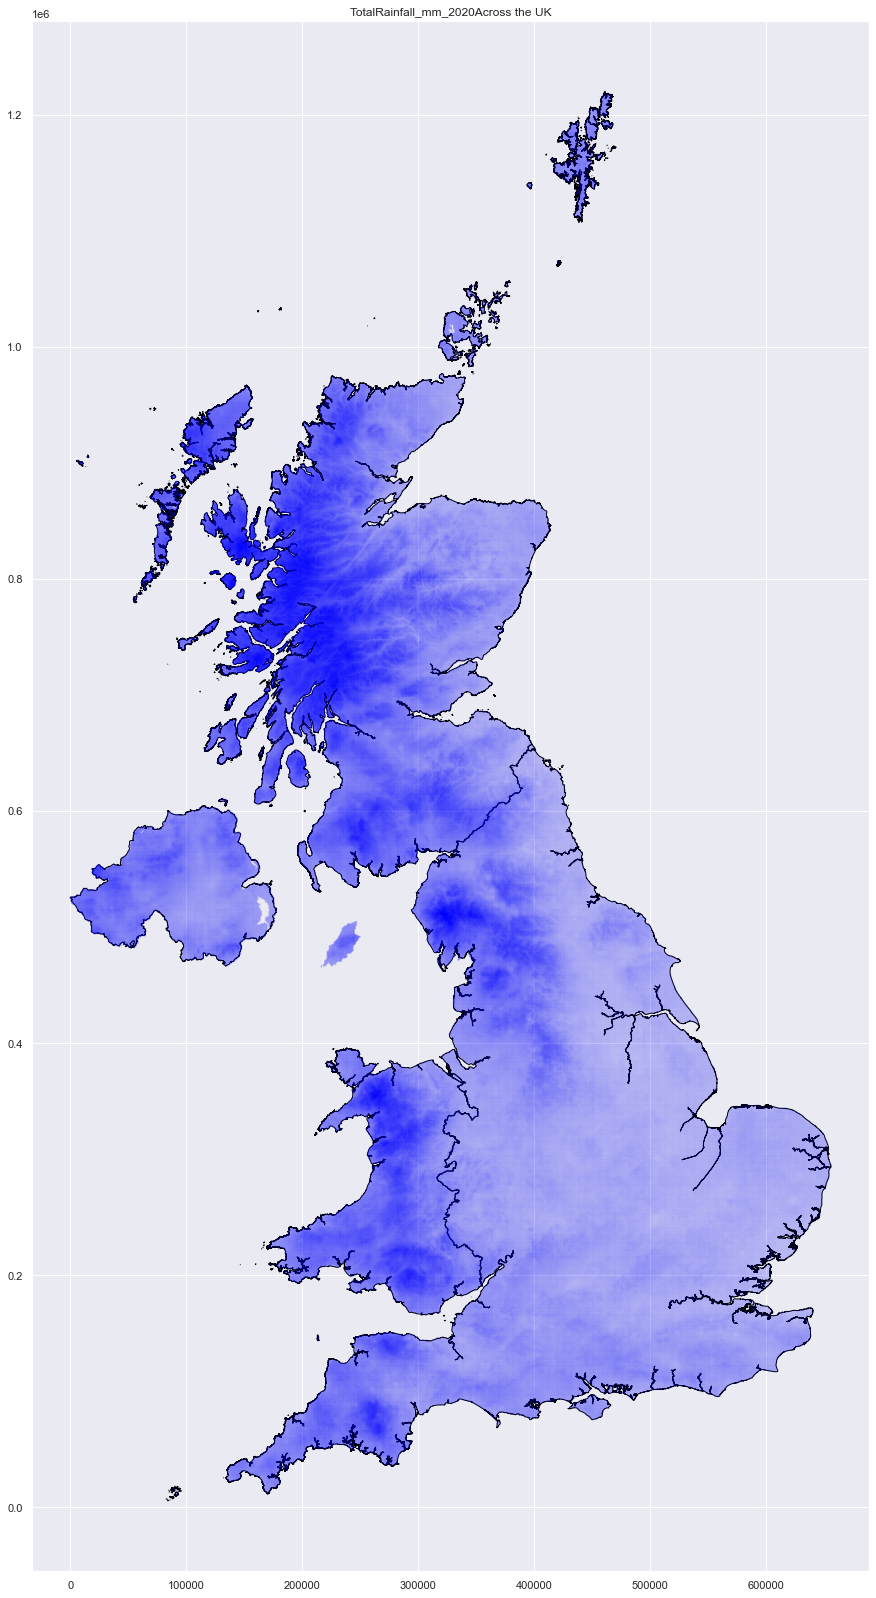

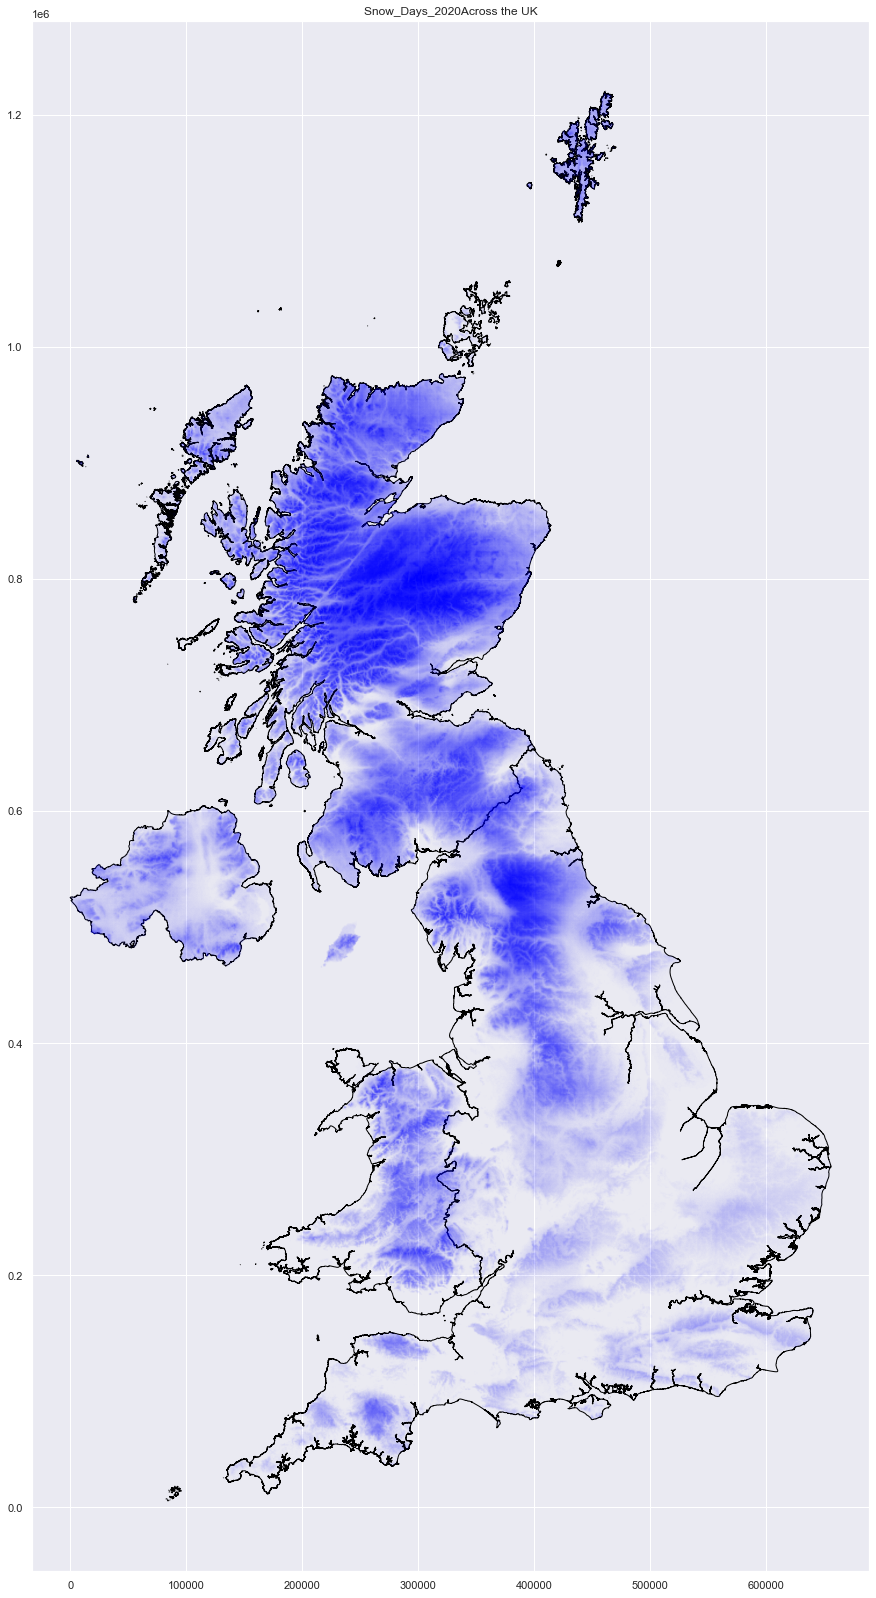

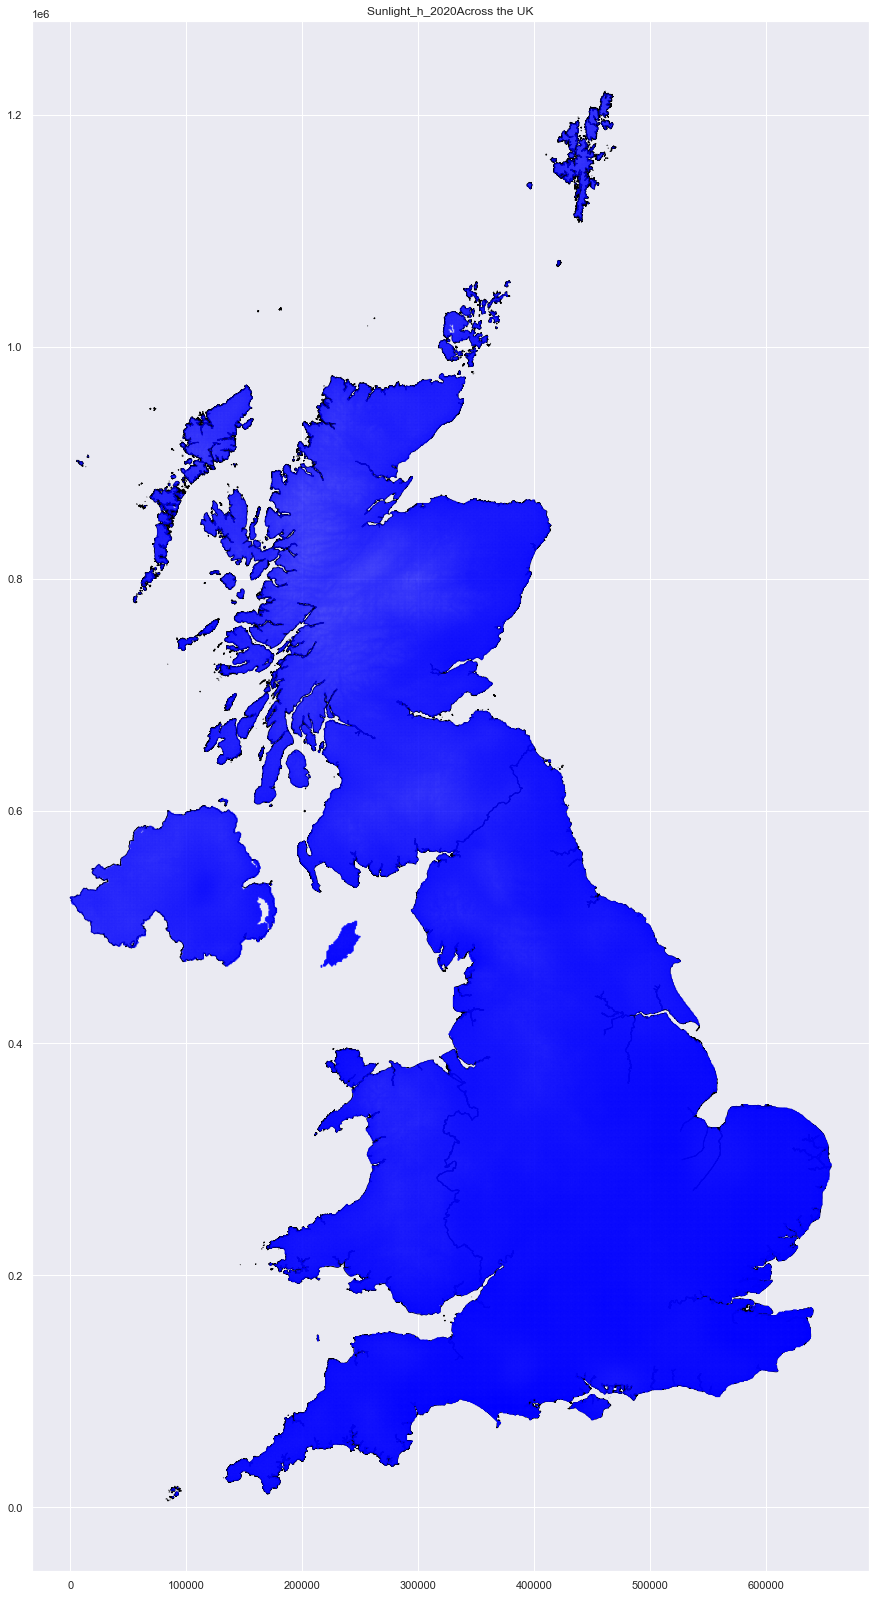

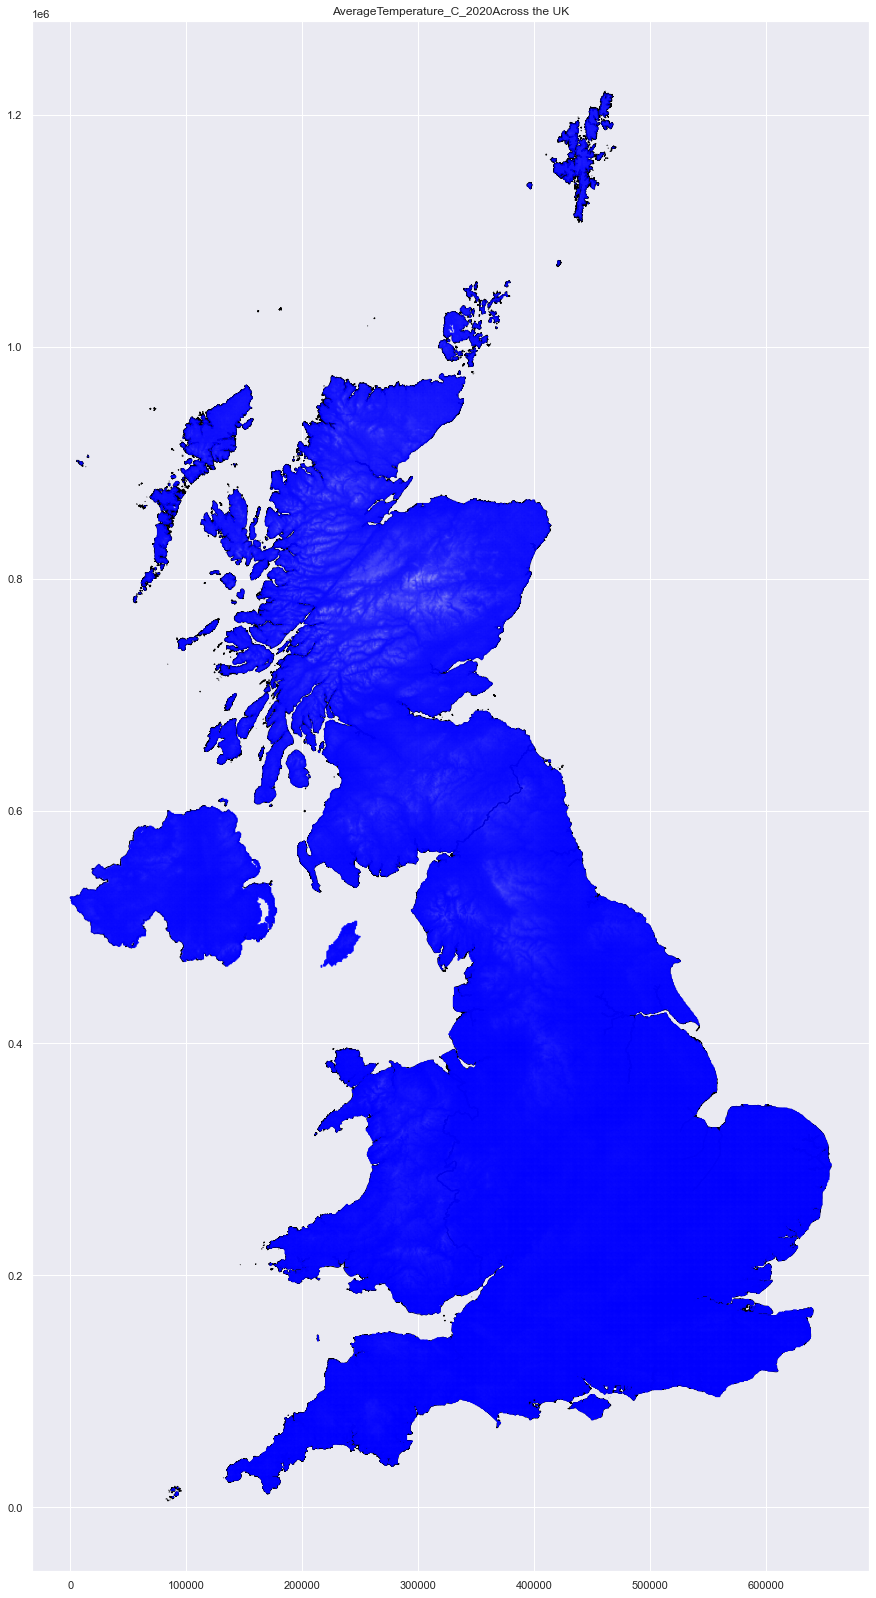

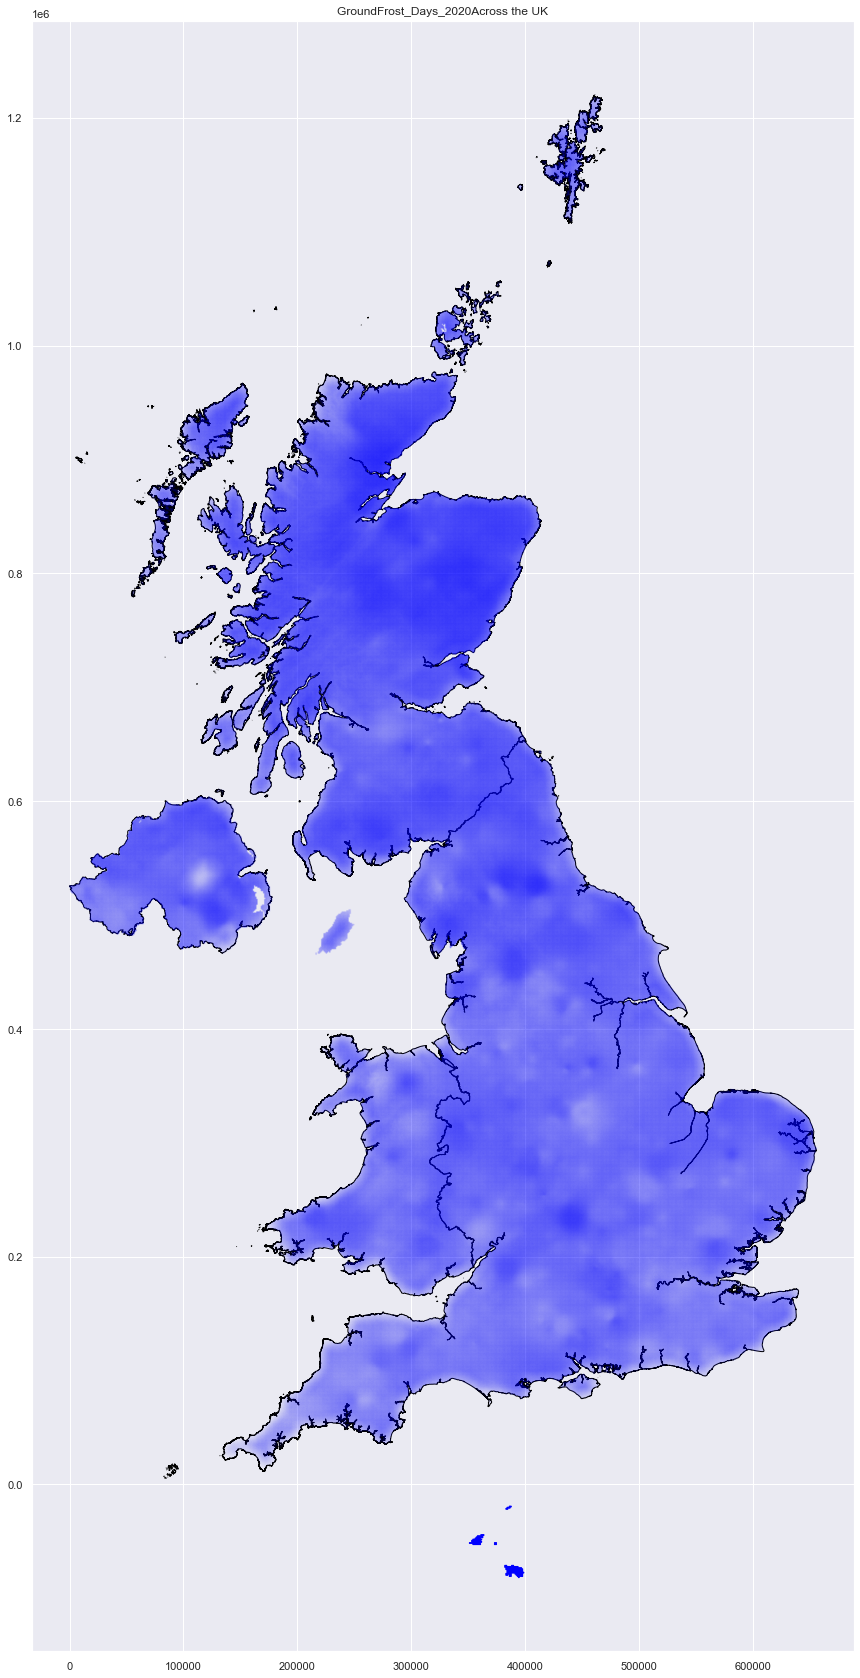

In [103]:
for i in ['TotalRainfall_mm_2020', 'Snow_Days_2020', 'Sunlight_h_2020', 'AverageTemperature_C_2020', 'GroundFrost_Days_2020']:
    fig, ax = plt.subplots(1, figsize=(15,30))

    plt.title(str(i) + "Across the UK")
    gdf.loc[gdf["Type"]=="All_GB",:].plot(ax=ax, color='none', edgecolor='black', zorder=1)

    points = gdf.loc[(gdf["Type"]=="MetOffice") & (gdf["Name"]==i) & (gdf["Details_Float"].notna()),:].copy()
    points.plot(ax=ax, c="blue", markersize=1, alpha=points["Details_Float"]/points["Details_Float"].max())

    plt.savefig("D:/GeoData/WorkingData/Images/" + i +''.png',dpi=300)

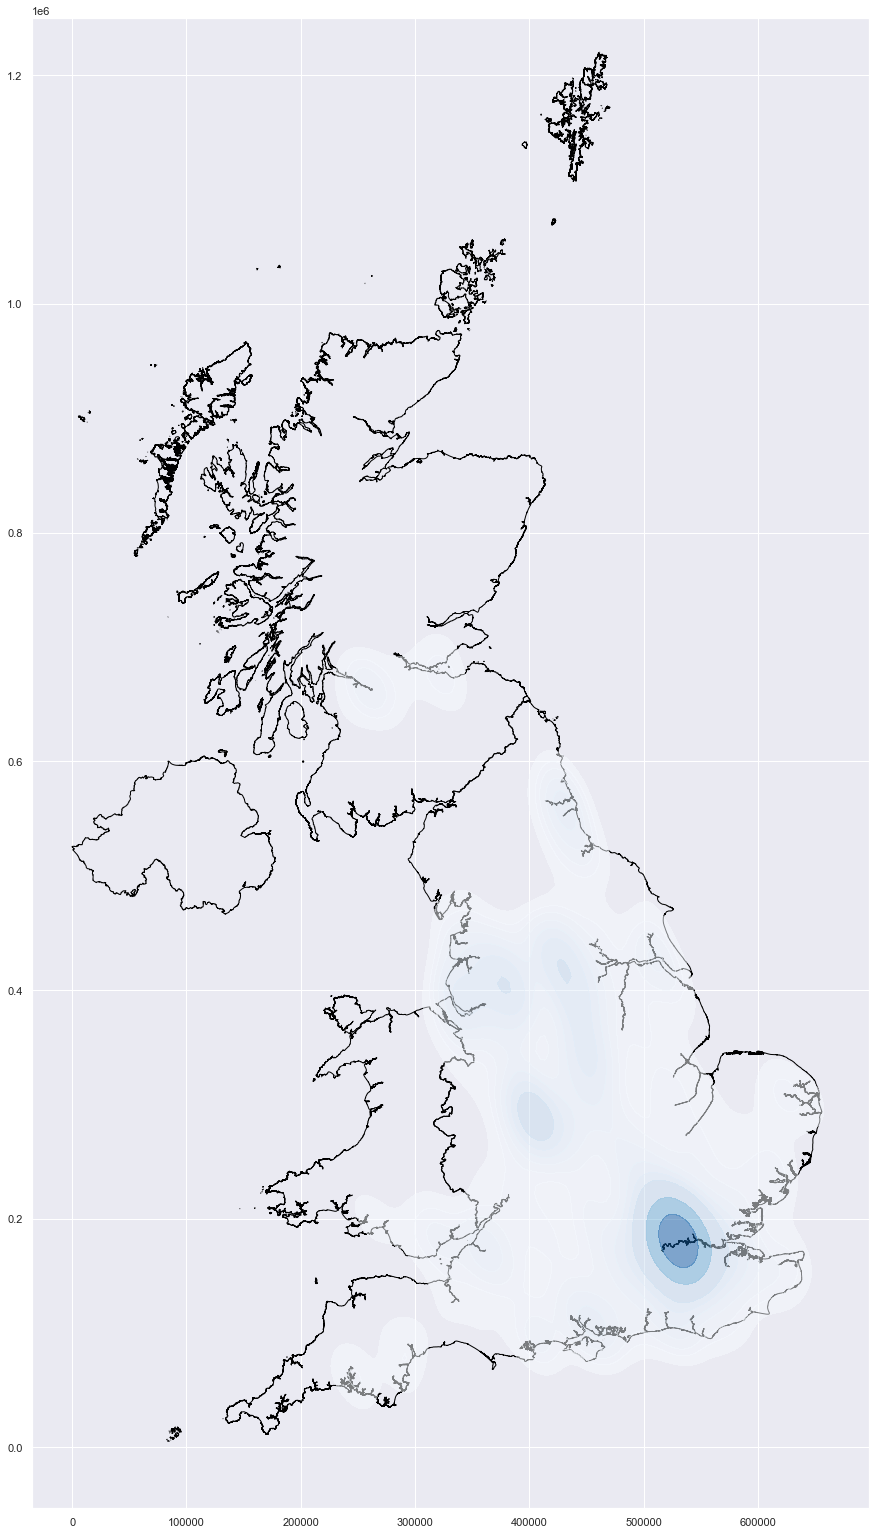

In [75]:
#https://towardsdatascience.com/from-kernel-density-estimation-to-spatial-analysis-in-python-64ddcdb6bc9b
fig, ax = plt.subplots(1, figsize=(15,30))
gdf.loc[gdf["Type"]=="All_GB",:].plot(ax=ax, color='none', edgecolor='black', zorder=1)

# Create thresholds
levels = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]

kde = sns.kdeplot(
    ax=ax,
    x=points['geometry'].x,
    y= points['geometry'].y,
    levels = levels,
    shade=True,
    cmap='Blues',
    alpha=0.5,
    
)


In [76]:
import scipy.stats

In [ ]:
# Calculate the KDE
data = np.c_[points['geometry'].x, points['geometry'].y]
kde = scipy.stats.gaussian_kde(data.T, bw_method="scott", weights=points['geometry'])
data_std = data.std(axis=0, ddof=1)
bw_x = getattr(kde, "scotts_factor")() * data_std[0]
bw_y = getattr(kde, "scotts_factor")() * data_std[1]
grid_x = grid_y = 100
x_support = sns.utils._kde_support(data[:, 0], bw_x, grid_x, 3, (axis[0], axis[2]))
y_support = sns.utils._kde_support(data[:, 1], bw_y, grid_y, 3, (axis[1], axis[3]))
xx, yy = np.meshgrid(x_support, y_support)
levels = kde([xx.ravel(), yy.ravel()]).reshape(xx.shape)